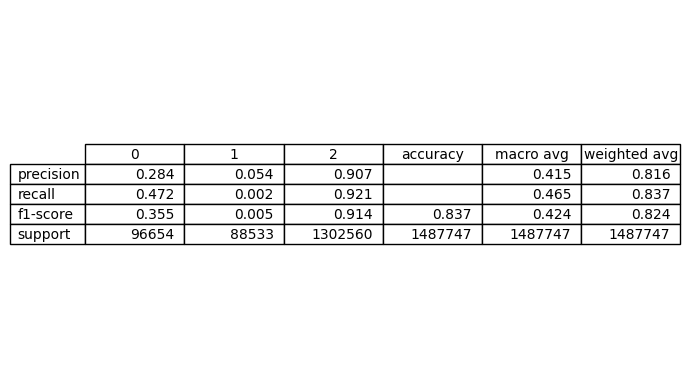

In [4]:
import matplotlib.pyplot as plt

# 输入数据
data = {
    'Class': ['0', '1', '2', 'accuracy', 'macro avg', 'weighted avg'],
    'precision': [0.284, 0.054, 0.907, None, 0.415, 0.816],
    'recall': [0.472, 0.002, 0.921, None, 0.465, 0.837],
    'f1-score': [0.355, 0.005, 0.914, 0.837 , 0.424, 0.824],
    'support': [96654, 88533, 1302560, 1487747, 1487747, 1487747]
}

# 绘制表格
fig, ax = plt.subplots()
ax.axis('off')
ax.table(cellText=[data['precision'], data['recall'], data['f1-score'], data['support']],
         rowLabels=['precision', 'recall', 'f1-score', 'support'],
         colLabels=data['Class'],
         loc='center')

# 设置表格样式
table = ax.table(cellText=[data['precision'], data['recall'], data['f1-score'], data['support']],
                 rowLabels=['precision', 'recall', 'f1-score', 'support'],
                 colLabels=data['Class'],
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# 保存图片
plt.savefig('table_image.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
import pandas as pd
dt = pd.read_csv('/content/drive/MyDrive/review (1).csv')
dt

,business_id,rating,review_text
0,605730f68cd0e3d69a52284b,4,We came for a birthday brunch and this place i...
1,605730f68cd0e3d69a52284b,5,"Cool place to hang out, have drinks. There is..."
2,605730f68cd0e3d69a52284b,2,This place doesn’t rock the senses when it com...
3,605730f68cd0e3d69a52284b,3,Pretty cool place to hang out with friends and...
4,605730f68cd0e3d69a52284b,5,We saw this place the other day when we had re...
...,...,...,...
1487742,60401a5466e8bd764351f091,5,Ordered the Chicken Tikka Masala and Chicken K...
1487743,60401a5466e8bd764351f091,5,Great shrimp tikka masala. A little too much r...
1487744,60401a5466e8bd764351f091,4,"Good food, great portions. The chicken I order..."
1487745,60401a5466e8bd764351f091,4,Amazing is really good you guys should try it ...


In [6]:
dt['rating'].value_counts()

5    1013454
4     289106
3      88533
1      58645
2      38009
Name: rating, dtype: int64

In [7]:
df_dataset = dt[['review_text','rating']]
df_dataset.columns = ['review_text','rating']
df_dataset.head()

,review_text,rating
0,We came for a birthday brunch and this place i...,4
1,"Cool place to hang out, have drinks. There is...",5
2,This place doesn’t rock the senses when it com...,2
3,Pretty cool place to hang out with friends and...,3
4,We saw this place the other day when we had re...,5


##低分评价更复杂

In [8]:
import numpy as np
dt['sentence_length'] = dt['review_text'].apply(lambda x: len(x.split()))

average_length = dt.groupby('rating')['sentence_length'].mean()
average_length

rating
1    75.833609
2    76.287642
3    59.604272
4    42.823978
5    35.228578
Name: sentence_length, dtype: float64

In [9]:
pip install textblob

In [10]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16510 sha256=d2d60a8dabeab5f90fbd6afd0c7e86008ed36b53ec6c04146b09f8afaf8b3590
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [11]:
import pandas as pd
from textblob import TextBlob
import swifter
from tqdm import tqdm
from sklearn.metrics import classification_report

limited_dt = dt.head(50000)
# 创建一个函数来计算情感得分
def calculate_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# 创建一个新的列来存储情感得分
limited_dt['sentiment_score'] = limited_dt['review_text'].swifter.apply(calculate_sentiment_score)


Pandas Apply:   0%|          | 0/50000 [00:00<?, ?it/s]

<ipython-input-11-426f6cdac752>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_dt['sentiment_score'] = limited_dt['review_text'].swifter.apply(calculate_sentiment_score)


In [12]:
limited_dt['sentiment_score']

0        0.271875
1        0.419697
2        0.408889
3        0.149953
4        0.344500
           ...   
49995    0.522000
49996    0.262500
49997    1.000000
49998    0.468750
49999    0.137500
Name: sentiment_score, Length: 50000, dtype: float64

In [13]:
label_dict = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2}  # 保持五个分类的映射

labels = dt['rating'].tolist()
labels_ = [label_dict[i] for i in labels]


In [14]:
def calculate_sentiment_score(text):
    return TextBlob(text).sentiment.polarity


In [15]:
dt['sentiment_score'] = dt['review_text'].swifter.apply(calculate_sentiment_score)


Pandas Apply:   0%|          | 0/1487747 [00:00<?, ?it/s]

In [16]:
labels_pre = []
for score in tqdm(dt['sentiment_score'].tolist()):
    if score < 0:
        labels_pre.append(0)  # 负面
    elif score == 0:
        labels_pre.append(1)  # 中性
    else:
        labels_pre.append(2)  # 赞扬


100%|██████████| 1487747/1487747 [00:01<00:00, 1088286.94it/s]


In [ ]:
target_names = [ '负面', '中性', '赞扬']  # 对应三个分类

print(classification_report(labels_, labels_pre, target_names=target_names, digits=3))

In [21]:
neutral_sentences = []
ratings = []

for sentence, score, rating in zip(limited_dt['review_text'], limited_dt['sentiment_score'], limited_dt['rating']):
    if score == 0.0:
        neutral_sentences.append(sentence)
        ratings.append(rating)

print("情感得分为0.0的句子及其对应的评分：")
for sentence, rating in zip(neutral_sentences, ratings):
    print(f"句子：{sentence}\t评分：{rating}")


情感得分为0.0的句子及其对应的评分：
句子：Went for dinner with family around 6 pm. on Saturday...no wait period...Awesome Atmosphere...Great Food ....Excellent Server and service...	评分：5
句子：Tacos are fire, but don't do ground beef. Asada and pollo all day bro...	评分：5
句子：Found a spot at the bar and got it in. Everything was delsih.	评分：5
句子：This place never disappoints, it’s now religion whenever I visit Orlando.	评分：5
句子：Closest thing to eating a bagel with lox in Manhattan station. Perfection! 	评分：5
句子：Corned beef and pastrami on rye is the yummy way to go	评分：5
句子：Spot on with food and service. Leave room for desert. Had combo for 3 & it was just my wife and I. Yes, we took food home for breakfast the next day	评分：5
句子：Things I miss about Vegas!!!! The bagels that I brought back to Texas took 1/2 my space in the luggage.	评分：5
句子：OMG--the Reuben omlette!! Corned beef, sauerkraut, Russian dressing and cheese!!	评分：5
句子：Just like being in a NYC deli	评分：5
句子：Gave me a place to go to get some work done when I wa

In [22]:
total_length = sum(len(sentence) for sentence in neutral_sentences)
average_length = total_length / len(neutral_sentences)
print(f"情感得分为0.0的句子平均长度：{average_length:.2f}")

情感得分为0.0的句子平均长度：70.83


In [20]:
label2_count = labels_pre.count(2)

# 打印结果
print("被分类为label2的文本数量：", label2_count)


被分类为label2的文本数量： 1371252


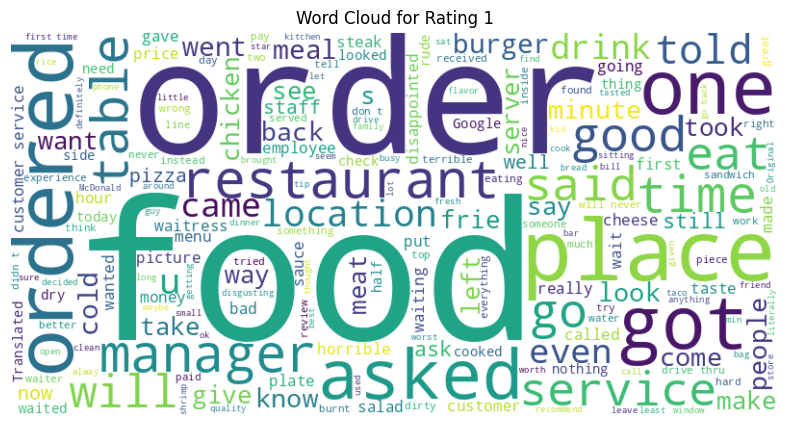

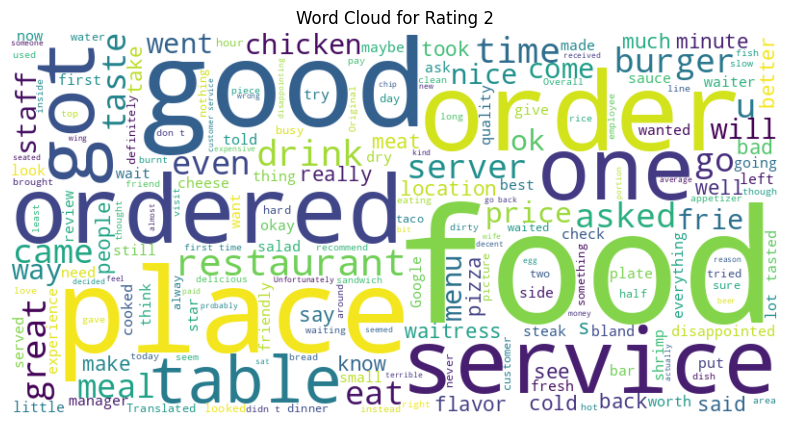

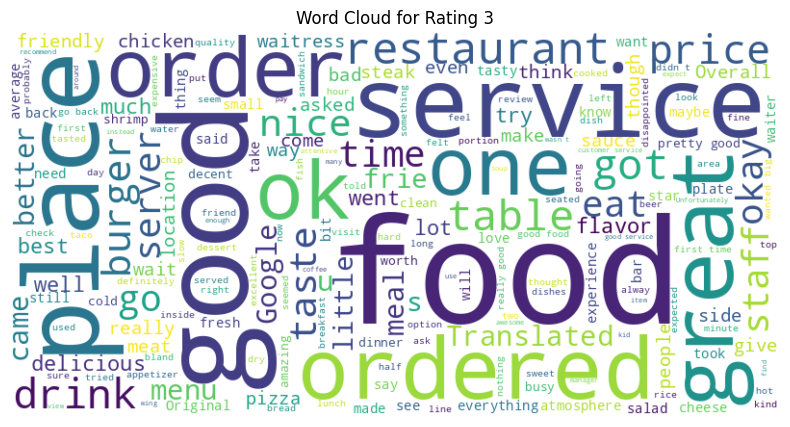

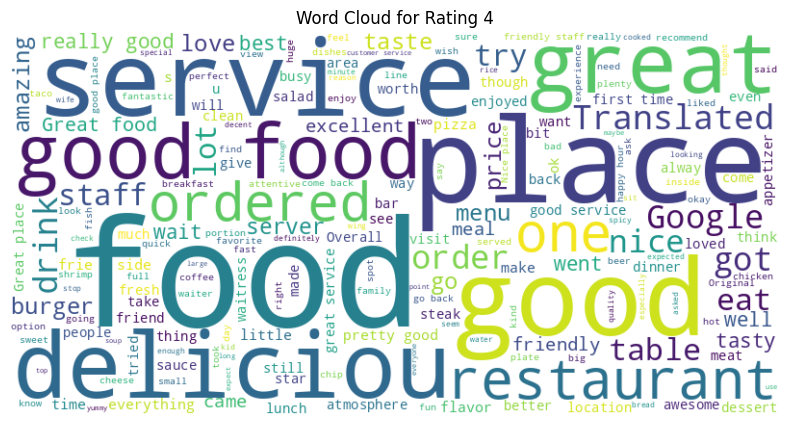

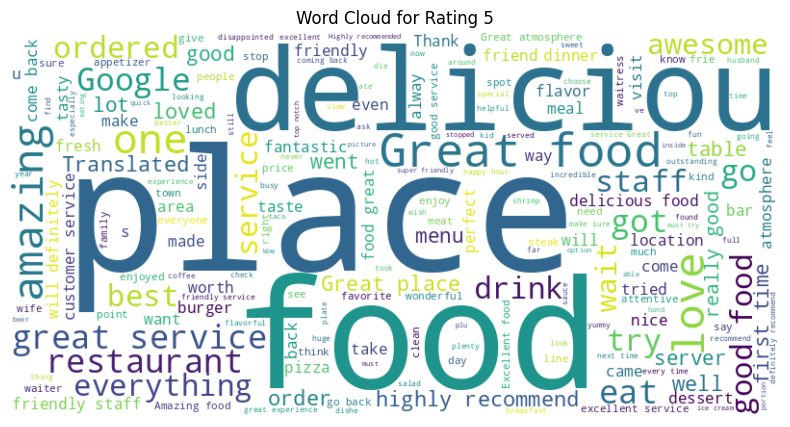

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 假设df_dataset是你的数据集
# 1. 按照rating分类对文本进行分组
grouped_text = df_dataset.groupby('rating')['review_text'].apply(lambda x: ' '.join(x)).reset_index()

# 2. 创建每个分类的词云图像并显示
for index, row in grouped_text.iterrows():
    rating = row['rating']
    text = row['review_text']

    # 创建词云对象和生成
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    wordcloud.generate(text)

    # 获取词云图像的像素值
    image = wordcloud.to_image()

    # 显示词云图像
    plt.figure(figsize=(10, 5))
    plt.imshow(image, interpolation='bilinear')
    plt.title(f"Word Cloud for Rating {rating}")
    plt.axis('off')
    plt.show()


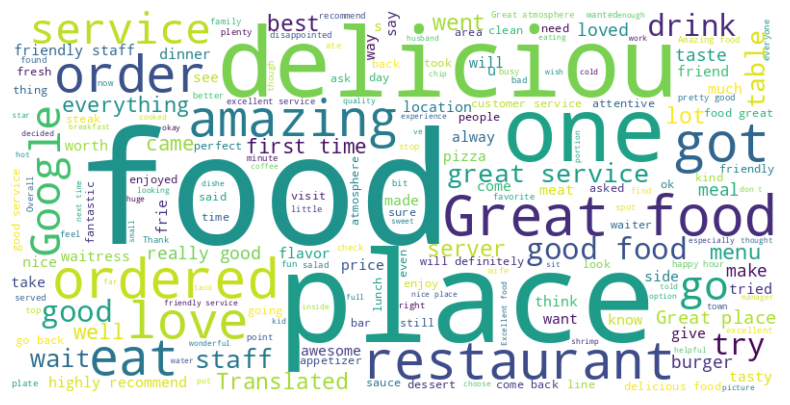

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(dt['review_text'].tolist())

# 创建词云对象和生成
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate(all_text)

# 获取词云图像的像素值
image = wordcloud.to_image()

# 显示词云图像
plt.figure(figsize=(10, 5))
plt.imshow(image, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
pip install transformers


In [ ]:
train_df = df_dataset[:90000]
eval_df = df_dataset[-10000:]

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [ ]:
import re

def preprocess_text(text):
    # 删除非英文字符和标点符号
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # 删除纯标点符号的句子
    if re.match(r"^[^\w\s]+$", text):
        return None
    return text.strip()

# 数据预处理
train_texts = train_df['review_text'].tolist()
train_labels = train_df['rating'].tolist()

eval_texts = eval_df['review_text'].tolist()
eval_labels = eval_df['rating'].tolist()

# 过滤数据
train_texts = [preprocess_text(text) for text in train_texts]
eval_texts = [preprocess_text(text) for text in eval_texts]

# 去除为空的句子
train_texts = [text for text in train_texts if text is not None]
eval_texts = [text for text in eval_texts if text is not None]

# 分词和添加特殊标记
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
eval_encodings = tokenizer(eval_texts, truncation=True, padding=True)

# 转换为模型输入张量
train_inputs = torch.tensor(train_encodings['input_ids'])
train_labels = torch.tensor(train_labels)
eval_inputs = torch.tensor(eval_encodings['input_ids'])
eval_labels = torch.tensor(eval_labels)

train_dataset = torch.utils.data.TensorDataset(train_inputs, train_labels)
eval_dataset = torch.utils.data.TensorDataset(eval_inputs, eval_labels)


In [ ]:
unique_labels = set(train_labels)
print("Unique labels in train_labels:", unique_labels)


Unique labels in train_labels: {tensor(1), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(2), tensor(5), tensor(2), tensor(4), tensor(5), tensor(5), tensor(3), tensor(5), tensor(5), tensor(5), tensor(2), tensor(5), tensor(5), tensor(5), tensor(3), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(5), tensor(4), tensor(5), tensor(4), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(4), tensor(1), tensor(5), tensor(5), tensor(5), tensor(3), tensor(1), tensor(5), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(2), tensor(4), tensor(5), tensor(4), tensor(5), tensor(5), tensor(1), tensor(4), tensor(3), tensor(5), tensor(5), tensor(4), tensor(5), tensor(4), tensor(5), tensor(5), tensor(4), tensor(4), tensor(5), 

In [ ]:
label_dict = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2}
default_label = 0

# 将评分映射为新的分类
train_labels = [label_dict.get(label, default_label) for label in train_labels]
eval_labels = [label_dict.get(label, default_label) for label in eval_labels]


In [ ]:
import torch

In [ ]:

# 定义训练参数
batch_size = 16
epochs = 3
learning_rate = 2e-5

# 定义数据加载器
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
eval_loader = torch.utils.data.DataLoader(eval_dataset, batch_size=batch_size)

# 定义优化器和损失函数
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.CrossEntropyLoss()

# 模型训练
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)[0]
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # 在评估集上进行验证
    model.eval()
    eval_loss = 0
    total_correct = 0

    with torch.no_grad():
        for inputs, labels in eval_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)[0]
            loss = loss_fn(outputs, labels)
            eval_loss += loss.item()

            _, predicted_labels = torch.max(outputs, 1)
            total_correct += (predicted_labels == labels).sum().item()

# 打印训练和验证结果
    print(f'Epoch {epoch + 1}/{epochs} - Loss: {total_loss:.4f} - Eval Loss: {eval_loss:.4f}')
    print(f'Accuracy: {total_correct / len(eval_dataset):.4f}\n')

